# data aggregation using builtin funs and user-defined functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [280]:
import os
os.getcwd()


'd:\\cs(h)Vsem Data analysis and visulaization 2021\\programs\\pandas'

# reading titanictrain data for summarizing

In [2]:
titanicdf1 = pd.read_csv('titanictrain.csv')
titanicdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
len(titanicdf1)

891

# Preprocessing

## replacing Nan values with mode in both types of features numeric and non-numeric

In [3]:
for col in titanicdf1:
    if titanicdf1[col].values.dtype  in [np.int64,np.float64]:
        print(col, titanicdf1[col].values.dtype,"Numeric")
        if titanicdf1[col].isnull().sum()>0:
            print("replacing by mode values")
            x=titanicdf1[col].mode().values
            titanicdf1[col].replace(np.NaN,x[0],inplace=True)
    else:
       
        print(col, titanicdf1[col].values.dtype,"Categorical")
        if titanicdf1[col].isnull().sum()>0:
            print("Null values to be replaced by modal value")
            m=titanicdf1[col].describe()[2]
            titanicdf1[col].replace(np.NaN,m,inplace=True)

PassengerId int64 Numeric
Survived int64 Numeric
Pclass int64 Numeric
Name object Categorical
Sex object Categorical
Age float64 Numeric
replacing by mode values
SibSp int64 Numeric
Parch int64 Numeric
Ticket object Categorical
Fare float64 Numeric
Cabin object Categorical
Null values to be replaced by modal value
Embarked object Categorical
Null values to be replaced by modal value


# Group by clause

## Find groups in the data on the basis of unique values in a column

In [5]:
titanicdf1.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577,577


## grouping over two attributes

In [4]:
gp1=titanicdf1.groupby(['Cabin','Sex'])

In [5]:
type(gp1)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
gp1.mean()

PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare
Cabin Sex                                                                 
A10   male          584.0       0.0     1.0  36.00    0.0   0.00  40.12500
A14   male          476.0       0.0     1.0  24.00    0.0   0.00  52.00000
A16   female        557.0       1.0     1.0  48.00    1.0   0.00  39.60000
A19   male          285.0       0.0     1.0  24.00    0.0   0.00  26.00000
A20   male          600.0       1.0     1.0  49.00    1.0   0.00  56.92920
...                   ...       ...     ...    ...    ...    ...       ...
F38   male          777.0       0.0     3.0  24.00    0.0   0.00   7.75000
F4    female        619.0       1.0     2.0   4.00    2.0   1.00  39.00000
      male          184.0       1.0     2.0   1.00    2.0   1.00  39.00000
G6    female        216.0       0.5     3.0  14.75    0.5   1.25  13.58125
T     male          340.0       0.0     1.0  45.00    0.0   0.00  35.50000

[171 rows x 7 columns]

# Use of keys and group contents

In [11]:
gp1.keys

['Cabin', 'Sex']

## number of elements in the gp1 object (rowsxcolumn)

In [7]:
len(gp1)

173

## number of rows in gp1

In [13]:
len(gp1)

171

# iterating over groups

In [14]:
gp1.indices

{('A10', 'male'): array([583], dtype=int64),
 ('A14', 'male'): array([475], dtype=int64),
 ('A16', 'female'): array([556], dtype=int64),
 ('A19', 'male'): array([284], dtype=int64),
 ('A20', 'male'): array([599], dtype=int64),
 ('A23', 'male'): array([630], dtype=int64),
 ('A24', 'male'): array([867], dtype=int64),
 ('A26', 'male'): array([647], dtype=int64),
 ('A31', 'male'): array([209], dtype=int64),
 ('A32', 'male'): array([185], dtype=int64),
 ('A34', 'male'): array([445], dtype=int64),
 ('A36', 'male'): array([806], dtype=int64),
 ('A5', 'male'): array([96], dtype=int64),
 ('A6', 'male'): array([23], dtype=int64),
 ('A7', 'male'): array([174], dtype=int64),
 ('B101', 'male'): array([737], dtype=int64),
 ('B102', 'male'): array([815], dtype=int64),
 ('B18', 'female'): array([329, 523], dtype=int64),
 ('B19', 'male'): array([170], dtype=int64),
 ('B20', 'female'): array([781], dtype=int64),
 ('B20', 'male'): array([690], dtype=int64),
 ('B22', 'female'): array([540], dtype=int64),


In [8]:
gp1.keys

['Cabin', 'Sex']

In [9]:
for (k1, k2), group in gp1:
    print((k1, k2))#,group.columns)
    #print(len(group[['Fare','Parch']]))

('A10', 'male')
('A14', 'male')
('A16', 'female')
('A19', 'male')
('A20', 'male')
('A23', 'male')
('A24', 'male')
('A26', 'male')
('A31', 'male')
('A32', 'male')
('A34', 'male')
('A36', 'male')
('A5', 'male')
('A6', 'male')
('A7', 'male')
('B101', 'male')
('B102', 'male')
('B18', 'female')
('B19', 'male')
('B20', 'female')
('B20', 'male')
('B22', 'female')
('B22', 'male')
('B28', 'female')
('B3', 'female')
('B30', 'male')
('B35', 'female')
('B37', 'male')
('B38', 'male')
('B39', 'female')
('B4', 'female')
('B41', 'male')
('B42', 'female')
('B49', 'female')
('B49', 'male')
('B5', 'female')
('B50', 'male')
('B51 B53 B55', 'male')
('B57 B59 B63 B66', 'female')
('B58 B60', 'female')
('B58 B60', 'male')
('B69', 'female')
('B71', 'male')
('B73', 'female')
('B77', 'female')
('B78', 'female')
('B79', 'female')
('B80', 'female')
('B82 B84', 'male')
('B86', 'male')
('B94', 'male')
('B96 B98', 'female')
('B96 B98', 'male')
('C101', 'female')
('C103', 'female')
('C104', 'male')
('C106', 'male')
('

## Find total fare paid by male and female passengers individually

In [10]:
titanicdf1.groupby(['Sex'])['Fare'].sum()

Sex
female    13966.6628
male      14727.2865
Name: Fare, dtype: float64

## Find average fare paid by male/female for each embarked station C:Cherborug Q: queenstown  H: Hampston.
* grouping a single column as per requirement

In [11]:
G1=titanicdf1['Fare'].groupby([titanicdf1['Sex'],titanicdf1['Embarked']])

In [13]:
G1.mean()

Sex     Embarked
female  C           75.169805
        Q           12.634958
        S           38.740929
male    C           48.262109
        Q           13.838922
        S           21.711996
Name: Fare, dtype: float64

## Compute family size as sum of Parch and sibsp, then find number of passengers with same family size and plot using bar chart

In [284]:
titanicdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familysize'],
      dtype='object')

In [285]:
titanicdf1['Familysize']=titanicdf1['Parch']+titanicdf1['SibSp']

In [286]:
titanicdf1['Familysize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [15]:
G3=titanicdf1.groupby('Familysize')

In [292]:
for k,group in G3:
    print(k,len(group['Fare']))

0 537
1 161
2 102
3 29
4 15
5 22
6 12
7 6
10 7


## plots of all coulmns of G3

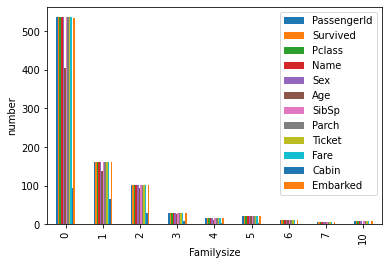

In [287]:
plt1=G3.count().plot.bar(label='count')
plt1.set_ylabel('number')
plt1.legend()

## Need is the count of passengers only for each family size

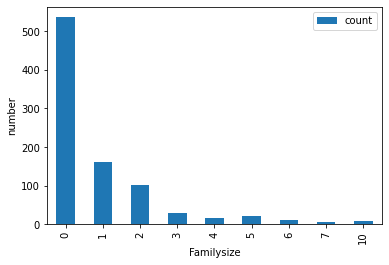

In [293]:
plt1=G3['PassengerId'].count().plot.bar(label='count')
plt1.set_ylabel('number')
plt1.legend()

In [294]:
G3.sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Familysize,,,,,,,
0,245946,163,1289,13017.00,0,0,11407.3238
1,66467,89,309,4363.42,123,38,8032.9547
2,45732,59,227,2421.33,89,115,4048.6332
3,14916,21,60,493.42,39,48,1591.0708
4,5518,3,40,229.00,32,28,871.4168
5,8803,3,57,405.00,62,48,1621.9000
6,4269,4,36,182.00,39,33,352.4000
7,2363,0,18,94.00,26,16,281.4000
10,3372,0,21,0.00,56,14,486.8500


In [295]:
G3.Fare.mean()

Familysize
0     21.242689
1     49.894129
2     39.692482
3     54.864510
4     58.094453
5     73.722727
6     29.366667
7     46.900000
10    69.550000
Name: Fare, dtype: float64

## plot total fare and number of survived by familysize

In [296]:
totalfare=G3['Fare'].sum()
totalsurvived=G3['Survived'].sum()
df1=pd.DataFrame([totalfare,totalsurvived])
df1


Familysize,0,1,2,3,4,5,6,7,10
Fare,11407.3238,8032.9547,4048.6332,1591.0708,871.4168,1621.9,352.4,281.4,486.85
Survived,163.0000,89.0000,59.0000,21.0000,3.0000,3.0,4.0,0.0,0.00


<AxesSubplot:ylabel='total'>

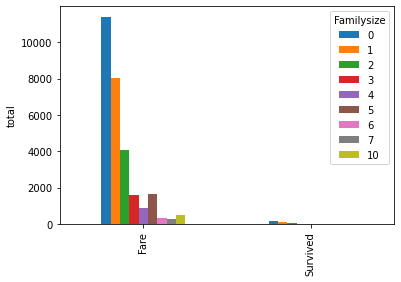

In [297]:
df1.plot.bar(ylabel='total')

## Get totalsurvive vs total fare side by side needs to unstack the columns of df1

In [ ]:
df2=df1.unstack(level=0)
df2
df2=df2.unstack()
df2

## or transpose the dataframe to intercgange rows and columns

In [22]:
df1.transpose()

,Fare,Survived
Familysize,,
0,11407.3238,163.0
1,8032.9547,89.0
2,4048.6332,59.0
3,1591.0708,21.0
4,871.4168,3.0
5,1621.9000,3.0
6,352.4000,4.0
7,281.4000,0.0
10,486.8500,0.0


<AxesSubplot:xlabel='Familysize', ylabel='total'>

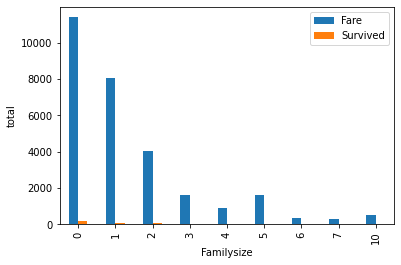

In [27]:
df2.plot.bar(ylabel='total')

## Find maximum family size of male/female

In [298]:
GF=titanicdf1.groupby('Sex')
GF['Familysize'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,1.343949,1.755733,0.0,0.0,1.0,2.0,10.0
male,577.0,0.665511,1.478106,0.0,0.0,0.0,1.0,10.0


In [299]:
GF['Familysize'].describe()['max']

Sex
female    10.0
male      10.0
Name: max, dtype: float64

## find meanage genderwise

In [300]:
GF['Age'].mean()

Sex
female    27.254777
male      29.281057
Name: Age, dtype: float64

# grouping by mapping for mapping groups of same type of columns

In [301]:
dfnew = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
dfnew.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
dfnew

,a,b,c,d,e
Joe,0.523417,0.968540,0.451748,-0.244929,0.989890
Steve,-0.020174,-0.085714,-0.279813,0.377087,0.680511
Wes,-2.242481,NaN,NaN,-0.323853,0.414841
Jim,1.191711,0.616598,-0.254920,1.207316,-0.975733
Travis,-0.900279,0.273980,1.523860,-0.965340,1.972498


In [302]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [303]:
by_column = dfnew.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.206819,2.481847
Steve,0.097274,0.574622
Wes,-0.323853,-1.827640
Jim,0.952396,0.832576
Travis,0.558520,1.346199


## grouping with functions: make groups using length of index labels

In [304]:
dfnew

,a,b,c,d,e
Joe,0.523417,0.968540,0.451748,-0.244929,0.989890
Steve,-0.020174,-0.085714,-0.279813,0.377087,0.680511
Wes,-2.242481,NaN,NaN,-0.323853,0.414841
Jim,1.191711,0.616598,-0.254920,1.207316,-0.975733
Travis,-0.900279,0.273980,1.523860,-0.965340,1.972498


In [305]:
dfnew.groupby(len).sum()

,a,b,c,d,e
3,-0.527353,1.585137,0.196828,0.638534,0.428998
5,-0.020174,-0.085714,-0.279813,0.377087,0.680511
6,-0.900279,0.273980,1.523860,-0.965340,1.972498


In [306]:
dfnew.groupby(len).count()

,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


In [44]:
T2=titanicdf1.set_index(['Sex','Embarked'])

In [45]:
T2.index.names

FrozenList(['Sex', 'Embarked'])

## sorting over second index level

In [46]:
T2.sort_index(level=1)
T2

PassengerId  Survived  Pclass  \
Sex    Embarked                                  
male   S                   1         0       3   
female C                   2         1       1   
       S                   3         1       3   
       S                   4         1       1   
male   S                   5         0       3   
...                      ...       ...     ...   
       S                 887         0       2   
female S                 888         1       1   
       S                 889         0       3   
male   C                 890         1       1   
       Q                 891         0       3   

                                                              Name   Age  \
Sex    Embarked                                                            
male   S                                   Braund, Mr. Owen Harris  22.0   
female C         Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
       S                                    Heikkinen, Miss. Laina  26.0   
       S              Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
male   S                                  Allen, Mr. William Henry  35.0   
...                                                            ...   ...   
       S                                     Montvila, Rev. Juozas  27.0   
female S                              Graham, Miss. Margaret Edith  19.0   
       S                  Johnston, Miss. Catherine Helen "Carrie"   NaN   
male   C                                     Behr, Mr. Karl Howell  26.0   
       Q                                       Dooley, Mr. Patrick  32.0   

                 SibSp  Parch            Ticket     Fare Cabin  Familysize  
Sex    Embarked                                                             
male   S             1      0         A/5 21171   7.2500   NaN           1  
female C             1      0          PC 17599  71.2833   C85           1  
       S             0      0  STON/O2. 3101282   7.9250   NaN           0  
       S             1      0            113803  53.1000  C123           1  
male   S             0      0            373450   8.0500   NaN           0  
...                ...    ...               ...      ...   ...         ...  
       S             0      0            211536  13.0000   NaN           0  
female S             0      0            112053  30.0000   B42           0  
       S             1      2        W./C. 6607  23.4500   NaN           3  
male   C             0      0            111369  30.0000  C148           0  
       Q             0      0            370376   7.7500   NaN           0  

[891 rows x 11 columns]

# Revision: read the Titanic dataset and replacing null values with mode for both categorical and numeric data column

In [51]:
titanicdf1 = pd.read_csv('titanictrain.csv')
titanicdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [307]:
for col in titanicdf1:
    if titanicdf1[col].values.dtype  in [np.int64,np.float64]:
        print(col, titanicdf1[col].values.dtype,"Numeric")
        if titanicdf1[col].isnull().sum()>0:
            print("replacing by mode values")
            x=titanicdf1[col].mode().values
            titanicdf1[col].replace(np.NaN,x[0],inplace=True)
    else:
       
        print(col, titanicdf1[col].values.dtype,"Categorical")
        if titanicdf1[col].isnull().sum()>0:
            print("Null values to be replaced by modal value")
            m=titanicdf1[col].describe()[2]
            titanicdf1[col].replace(np.NaN,m,inplace=True)

PassengerId int64 Numeric
Survived int64 Numeric
Pclass int64 Numeric
Name object Categorical
Sex object Categorical
Age float64 Numeric
SibSp int64 Numeric
Parch int64 Numeric
Ticket object Categorical
Fare float64 Numeric
Cabin object Categorical
Embarked object Categorical
Familysize int64 Numeric


In [309]:
titanicdf1.isna().sum().sum()

0

## Problem1: Find description of Values in Fare column for each cabin type

In [53]:
titanicdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# group by cabin and do thefollowing

## find total fare for each cabin type

In [312]:

grouped_cabin = titanicdf1.groupby('Cabin')
grouped_cabin['Fare'].mean().idxmax()

'B101'

In [ ]:
grouped_cabin['Fare'].describe()

In [313]:
grouped_cabin['Fare'].describe().sort_values('count')

,count,mean,std,min,25%,50%,75%,max
Cabin,,,,,,,,
A10,1.0,40.125000,NaN,40.1250,40.1250,40.1250,40.1250,40.1250
D30,1.0,53.100000,NaN,53.1000,53.1000,53.1000,53.1000,53.1000
D28,1.0,39.400000,NaN,39.4000,39.4000,39.4000,39.4000,39.4000
D21,1.0,51.862500,NaN,51.8625,51.8625,51.8625,51.8625,51.8625
D19,1.0,52.554200,NaN,52.5542,52.5542,52.5542,52.5542,52.5542
...,...,...,...,...,...,...,...,...
C22 C26,3.0,151.550000,0.000000,151.5500,151.5500,151.5500,151.5500,151.5500
F2,3.0,26.000000,0.000000,26.0000,26.0000,26.0000,26.0000,26.0000
C23 C25 C27,4.0,263.000000,0.000000,263.0000,263.0000,263.0000,263.0000,263.0000


## Find that index value of rows where cabin value == 'C23 C25 C27' 

In [ ]:
titanicdf1.loc[(titanicdf1['Cabin'] == 'C23 C25 C27')]

## get indices of those rows

In [51]:
titanicdf1[(titanicdf1['Cabin'] == 'C23 C25 C27')].index.tolist()

[27, 88, 341, 438]

## Find cabin with maximum fare

In [ ]:
total=grouped_cabin['Fare'].sum()
total[total==total.max()]

# Data aggregation:  Optimzed groupby methods:
* count: Number of non-NA values in the group
* sum: Sum of non-NA values
* mean: Mean of non-NA values
* median: Arithmetic median of non-NA values
* std, var: Unbiased (n – 1 denominator) standard deviation and variance
* min, max: Minimum and maximum of non-NA values
* prod: Product of non-NA values
* first, last: First and last non-NA values

## problem 1: Find standard deviation,mean and count of  Values in Fare column for each cabin type and replace Nan with 0

In [314]:
grouped_cabin['Fare'].agg(['mean','count','std'])

,mean,count,std
Cabin,,,
A10,40.125000,1,NaN
A14,52.000000,1,NaN
A16,39.600000,1,NaN
A19,26.000000,1,NaN
A20,56.929200,1,NaN
...,...,...,...
F33,11.333333,3,1.443376
F38,7.750000,1,NaN
F4,39.000000,2,0.000000


In [315]:
(grouped_cabin['Fare'].agg(['mean','count','std'])).replace(np.NaN,0)

,mean,count,std
Cabin,,,
A10,40.125000,1,0.000000
A14,52.000000,1,0.000000
A16,39.600000,1,0.000000
A19,26.000000,1,0.000000
A20,56.929200,1,0.000000
...,...,...,...
F33,11.333333,3,1.443376
F38,7.750000,1,0.000000
F4,39.000000,2,0.000000


## Problem 2: Find cabin with maximum number of passengers or three number of passengers travelling 

In [316]:
grouped_cabin.keys

'Cabin'

In [320]:
for k1, group in grouped_cabin:
    print(k1,group.columns)
    break

A10 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familysize'],
      dtype='object')


In [321]:
grouped_cabin.describe()

PassengerId                                                        \
            count        mean         std    min     25%    50%     75%   
Cabin                                                                     
A10           1.0  584.000000         NaN  584.0  584.00  584.0  584.00   
A14           1.0  476.000000         NaN  476.0  476.00  476.0  476.00   
A16           1.0  557.000000         NaN  557.0  557.00  557.0  557.00   
A19           1.0  285.000000         NaN  285.0  285.00  285.0  285.00   
A20           1.0  600.000000         NaN  600.0  600.00  600.0  600.00   
...           ...         ...         ...    ...     ...    ...     ...   
F33           3.0  310.000000  227.149730   67.0  206.50  346.0  431.50   
F38           1.0  777.000000         NaN  777.0  777.00  777.0  777.00   
F4            2.0  401.500000  307.591450  184.0  292.75  401.5  510.25   
G6          691.0  441.892909  259.249418    1.0  213.50  438.0  663.00   
T             1.0  340.000000         NaN  340.0  340.00  340.0  340.00   

             Survived            ...     Fare           Familysize            \
         max    count      mean  ...      75%       max      count      mean   
Cabin                            ...                                           
A10    584.0      1.0  0.000000  ...  40.1250   40.1250        1.0  0.000000   
A14    476.0      1.0  0.000000  ...  52.0000   52.0000        1.0  0.000000   
A16    557.0      1.0  1.000000  ...  39.6000   39.6000        1.0  1.000000   
A19    285.0      1.0  0.000000  ...  26.0000   26.0000        1.0  0.000000   
A20    600.0      1.0  1.000000  ...  56.9292   56.9292        1.0  1.000000   
...      ...      ...       ...  ...      ...       ...        ...       ...   
F33    517.0      3.0  1.000000  ...  11.7500   13.0000        3.0  0.000000   
F38    777.0      1.0  0.000000  ...   7.7500    7.7500        1.0  0.000000   
F4     619.0      2.0  1.000000  ...  39.0000   39.0000        2.0  3.000000   
G6     891.0    691.0  0.301013  ...  23.0000  512.3292      691.0  0.917511   
T      340.0      1.0  0.000000  ...  35.5000   35.5000        1.0  0.000000   

                                           
            std  min  25%  50%  75%   max  
Cabin                                      
A10         NaN  0.0  0.0  0.0  0.0   0.0  
A14         NaN  0.0  0.0  0.0  0.0   0.0  
A16         NaN  1.0  1.0  1.0  1.0   1.0  
A19         NaN  0.0  0.0  0.0  0.0   0.0  
A20         NaN  1.0  1.0  1.0  1.0   1.0  
...         ...  ...  ...  ...  ...   ...  
F33    0.000000  0.0  0.0  0.0  0.0   0.0  
F38         NaN  0.0  0.0  0.0  0.0   0.0  
F4     0.000000  3.0  3.0  3.0  3.0   3.0  
G6     1.737188  0.0  0.0  0.0  1.0  10.0  
T           NaN  0.0  0.0  0.0  0.0   0.0  

[147 rows x 64 columns]

In [322]:
m=grouped_cabin['PassengerId'].count()
m[(m==m.max()) | (m==3)]

Cabin
C22 C26      3
D            3
E101         3
F2           3
F33          3
G6         691
Name: PassengerId, dtype: int64

## problem 3: Find the average and std of  fare values in the cabin type with maximum records i.e. expecting different Fare values

In [323]:
G=grouped_cabin['Fare'].agg(['count','mean','std','min','max'])

In [324]:
G

,count,mean,std,min,max
Cabin,,,,,
A10,1,40.125000,NaN,40.1250,40.1250
A14,1,52.000000,NaN,52.0000,52.0000
A16,1,39.600000,NaN,39.6000,39.6000
A19,1,26.000000,NaN,26.0000,26.0000
A20,1,56.929200,NaN,56.9292,56.9292
...,...,...,...,...,...
F33,3,11.333333,1.443376,10.5000,13.0000
F38,1,7.750000,NaN,7.7500,7.7500
F4,2,39.000000,0.000000,39.0000,39.0000


In [325]:
m=G['count'].max()

In [326]:
G[G['count']==m][['mean','std','min','max','count']]

,mean,std,min,max,count
Cabin,,,,,
G6,19.125047,28.584262,0.0,512.3292,691


In [327]:
indx=G[G['count']==m][['mean','std','min','max','count']].index

In [328]:
v=indx.values

In [81]:
v[0]

'B96 B98'

## Problem4: Compare fare paid by the passengers of the cabinwith maximum passengers

In [20]:
import matplotlib.pyplot as plt
import matplotlib

In [86]:
for key,group in grouped_cabin:
    if key in v: #v is having cabintype with max passengers
        GF=group['Fare']

In [87]:
GF

10     16.7000
205    10.4625
251    10.4625
394    16.7000
Name: Fare, dtype: float64

# Compare fare distribution of males with that of females

In [329]:
gp=titanicdf1.groupby('Sex')

In [331]:
#newdf=pd.DataFrame()
for k,group in gp:
    print(k,type(group['Fare'])) 
    print(len(group['Fare'])) 
    if k == 'male':
        newdfMale=pd.DataFrame(group['Fare'])
        newdfMale.reset_index(drop=True,inplace=True)
    else:
        newdfFeMale=pd.DataFrame(group['Fare'])
        newdfFeMale.reset_index(drop=True,inplace=True)

    

female <class 'pandas.core.series.Series'>
314
male <class 'pandas.core.series.Series'>
577


In [332]:
newdfMale

,Fare
0,7.2500
1,8.0500
2,8.4583
3,51.8625
4,21.0750
...,...
572,10.5000
573,7.0500
574,13.0000
575,30.0000


<AxesSubplot:ylabel='Density'>

<Figure size 144x144 with 0 Axes>

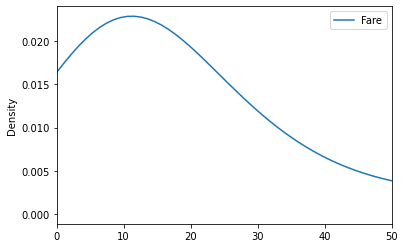

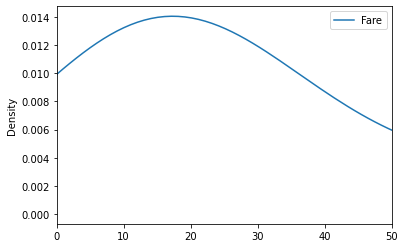

In [333]:
plt.figure(figsize=(2,2))
newdfMale.plot.density(xlim=[0,50])
newdfFeMale.plot.density(xlim=[0,50])


Text(0.5, 1.0, 'FeMale Fare')

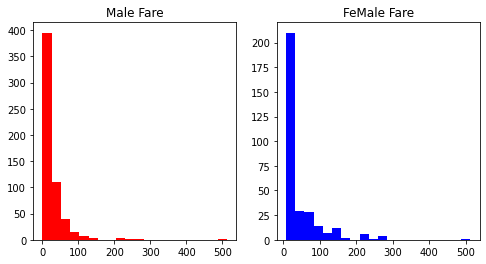

In [334]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(8, 4))
ax[0].hist(newdfMale['Fare'],bins=20,color='red')
ax[0].set_title("Male Fare" )
ax[1].hist(newdfFeMale['Fare'],bins=20,color='blue')
ax[1].set_title("FeMale Fare" )

<AxesSubplot:>

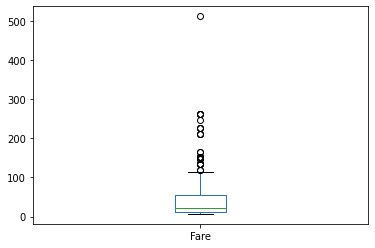

In [396]:
newdfFeMale.plot.box()

# above boxplot indicates a large number of outliers in fare column

outlier<(Q1-1.5(q3-q1)) out>Q3 + 1.5 * IQR # in general
Lower Quartile (Q1) = (N+1) * 1 / 4.
Middle Quartile (Q2) = (N+1) * 2 / 4.
Upper Quartile (Q3 )= (N+1) * 3 / 4.
Interquartile Range = Q3 – Q1

## Compute outliers in Fare column  of the Female group on the basis of  user-computed lowval and maxval

In [397]:
newdfFeMale.count()

Fare    314
dtype: int64

In [398]:
Q1=newdfFeMale['Fare'].quantile(0.25)

In [399]:
Q1

12.071875

In [400]:
Q3=newdfFeMale['Fare'].quantile(0.75)

In [401]:
newdfFeMale['Fare'].quantile(0.5)==newdfFeMale['Fare'].median()

True

In [402]:
Q2=newdfFeMale['Fare'].quantile(0.5)

In [403]:
print(Q1,Q2,Q3)

12.071875 23.0 55.0


In [404]:
newdfFeMale['Fare'].describe()

count    314.000000
mean      44.479818
std       57.997698
min        6.750000
25%       12.071875
50%       23.000000
75%       55.000000
max      512.329200
Name: Fare, dtype: float64

In [343]:
newdfFeMale['Fare'].min()

6.75

In [178]:
newdfFeMale['Fare'].max()

512.3292

In [411]:
IQR= Q3-Q1
lowval=Q1- 3*IQR
maxval=Q3+3*IQR
print(Q1,Q3,lowval,maxval)

12.071875 55.0 -116.7125 183.784375


In [197]:
type(maxval)

numpy.float64

In [201]:
GF.dtypes

Fare    float64
dtype: object

In [406]:
GF=newdfFeMale

In [407]:
GF.describe()

,Fare
count,314.000000
mean,44.479818
std,57.997698
min,6.750000
25%,12.071875
50%,23.000000
75%,55.000000
max,512.329200


In [408]:
GF[GF['Fare']>float(maxval)]

,Fare
15,146.5208
37,263.0000
68,146.5208
91,512.3292
94,153.4625
95,135.6333
105,151.5500
106,247.5208
113,262.3750
117,164.8667


In [412]:
GF[(GF['Fare']>maxval)|(GF['Fare']<lowval)]

,Fare
37,263.0000
91,512.3292
106,247.5208
113,262.3750
128,263.0000
144,227.5250
248,211.3375
251,227.5250
256,227.5250
262,211.3375


In [410]:
GF[(GF['Fare']>maxval)|(GF['Fare']<lowval)].index

Int64Index([ 15,  37,  68,  91,  94,  95, 105, 106, 113, 117, 118, 121, 126,
            127, 128, 144, 166, 184, 225, 248, 251, 254, 256, 262, 264, 269,
            275, 299],
           dtype='int64')

# Problem: Use titanic datasets to answer the following query:
Find total fare paid by the passengers of family-size 6 who have embarked from station S: 'South Hampton'
 

In [349]:
titanicdf1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [350]:
titanicdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familysize'],
      dtype='object')

In [351]:
titanicdf1[((titanicdf1['Embarked']=='S') & (titanicdf1['Familysize']==6))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,G6,S,6
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,G6,S,6
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,G6,S,6
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,G6,S,6
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,G6,S,6
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,G6,S,6
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,G6,S,6
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,G6,S,6
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,G6,S,6
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,G6,S,6


# define a user-define function to get number of outliers in a series/list alongwith outliers index. in case no outliers retuen Nan

In [413]:
def user_outliers(S):
    #print(S.count())
    Q1=S.quantile(0.25)
    Q3=S.quantile(0.75)
    IQR= Q3-Q1
    lowval=Q1- 1.5*IQR
    maxval=Q3+2*IQR
    LI=S[(S>maxval)|(S<lowval)].index
    #print(Q1,Q3,IQR,lowval,maxval)
    #print(S[(S>maxval)|(S<lowval)].count())
    if len(LI)==0:
        return np.NaN
    else:
        return (len(LI),LI)


In [414]:
G2=newdfFeMale['Fare'].agg(user_outliers)
type(G2)

tuple

In [415]:
G2

(21,
 Int64Index([ 15,  37,  68,  91,  94, 105, 106, 113, 117, 128, 144, 184, 225,
             248, 251, 254, 256, 262, 264, 275, 299],
            dtype='int64'))

In [416]:
G3=newdfMale['Fare'].agg(user_outliers)
G3

(46,
 Int64Index([ 13,  17,  32,  39,  62,  73,  74,  77,  88, 102, 130, 147, 161,
             169, 196, 203, 206, 209, 232, 233, 238, 241, 269, 274, 280, 303,
             316, 331, 339, 344, 349, 367, 407, 413, 416, 417, 422, 432, 433,
             447, 473, 477, 480, 510, 518, 552],
            dtype='int64'))

#  Explore following  using Seaborn's tips data

# find day-wise, (mean/max/std/min) of tips percentage and bill amount for each smoker type

In [4]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
tips[['sex','day','smoker']].value_counts()

sex     day   smoker
Male    Sun   No        43
        Sat   No        32
              Yes       27
Female  Thur  No        25
Male    Thur  No        20
        Sun   Yes       15
Female  Sat   Yes       15
        Sun   No        14
        Sat   No        13
Male    Thur  Yes       10
        Fri   Yes        8
Female  Thur  Yes        7
        Fri   Yes        7
        Sun   Yes        4
Male    Fri   No         2
Female  Fri   No         2
dtype: int64

In [419]:
for c in ['sex','day','smoker']:
    print(tips[c].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64


In [356]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
grouped = tips.groupby(['day', 'smoker'])

In [425]:
grouped.keys

['day', 'smoker']

In [428]:
grouped.indices

{('Thur',
  'Yes'): array([ 80,  83, 138, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201,
        202, 203, 204, 205], dtype=int64),
 ('Thur',
  'No'): array([ 77,  78,  79,  81,  82,  84,  85,  86,  87,  88,  89, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 195, 243], dtype=int64),
 ('Fri',
  'Yes'): array([ 90,  92,  93,  95,  96,  97,  98, 100, 101, 220, 221, 222, 224,
        225, 226], dtype=int64),
 ('Fri', 'No'): array([ 91,  94,  99, 223], dtype=int64),
 ('Sat',
  'Yes'): array([ 56,  58,  60,  61,  62,  63,  67,  69,  72,  73,  76, 102, 103,
        105, 106, 107, 109, 168, 169, 170, 171, 206, 207, 208, 209, 210,
        211, 213, 214, 215, 216, 217, 218, 219, 229, 230, 231, 234, 236,
        237, 240, 241], dtype=int64),
 ('Sat',
  'No'): array([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35, 

## display count of customers/non-smokers (smokers ) on Friday

In [430]:
for k in (grouped.groups).keys():
    if 'Fri' in set(k):
        print(k,len(dict(grouped.groups)[k]))

('Fri', 'No') 4
('Fri', 'Yes') 15


## in case tuple is passed as element of a list for agg() the first element is used as column name for displaying result in place of aggregate function

In [431]:
grouped[['tip_pct','total_bill']].agg(['mean', 'std','min','max'])

tip_pct                               total_bill             \
                 mean       std       min       max       mean        std   
day  smoker                                                                 
Thur Yes     0.163863  0.039389  0.090014  0.241255  19.190588   8.355149   
     No      0.160298  0.038774  0.072961  0.266312  17.113111   7.721728   
Fri  Yes     0.174783  0.051293  0.103555  0.263480  16.813333   9.086388   
     No      0.151650  0.028123  0.120385  0.187735  18.420000   5.059282   
Sat  Yes     0.147906  0.061375  0.035638  0.325733  21.276667  10.069138   
     No      0.158048  0.039767  0.056797  0.291990  19.661778   8.939181   
Sun  Yes     0.187250  0.154134  0.065660  0.710345  24.120000  10.442511   
     No      0.160113  0.042347  0.059447  0.252672  20.506667   8.130189   

                           
               min    max  
day  smoker                
Thur Yes     10.34  43.11  
     No       7.51  41.19  
Fri  Yes      5.75  40.17  
     No      12.46  22.75  
Sat  Yes      3.07  50.81  
     No       7.25  48.33  
Sun  Yes      7.25  45.35  
     No       8.77  48.17

In [432]:
grouped[['tip_pct','total_bill']].agg([('Average', 'mean'), ('Variation', 'std'),('least','min'),('Large','max')])

tip_pct                               total_bill             \
              Average Variation     least     Large    Average  Variation   
day  smoker                                                                 
Thur Yes     0.163863  0.039389  0.090014  0.241255  19.190588   8.355149   
     No      0.160298  0.038774  0.072961  0.266312  17.113111   7.721728   
Fri  Yes     0.174783  0.051293  0.103555  0.263480  16.813333   9.086388   
     No      0.151650  0.028123  0.120385  0.187735  18.420000   5.059282   
Sat  Yes     0.147906  0.061375  0.035638  0.325733  21.276667  10.069138   
     No      0.158048  0.039767  0.056797  0.291990  19.661778   8.939181   
Sun  Yes     0.187250  0.154134  0.065660  0.710345  24.120000  10.442511   
     No      0.160113  0.042347  0.059447  0.252672  20.506667   8.130189   

                           
             least  Large  
day  smoker                
Thur Yes     10.34  43.11  
     No       7.51  41.19  
Fri  Yes      5.75  40.17  
     No      12.46  22.75  
Sat  Yes      3.07  50.81  
     No       7.25  48.33  
Sun  Yes      7.25  45.35  
     No       8.77  48.17

## alternatively, default is fnname

In [381]:
fnname=['std','mean','min','max']

In [384]:
grouped[['tip_pct', 'total_bill']].agg(fnname)

tip_pct                               total_bill             \
                  std      mean       min       max        std       mean   
day  smoker                                                                 
Thur Yes     0.039389  0.163863  0.090014  0.241255   8.355149  19.190588   
     No      0.038774  0.160298  0.072961  0.266312   7.721728  17.113111   
Fri  Yes     0.051293  0.174783  0.103555  0.263480   9.086388  16.813333   
     No      0.028123  0.151650  0.120385  0.187735   5.059282  18.420000   
Sat  Yes     0.061375  0.147906  0.035638  0.325733  10.069138  21.276667   
     No      0.039767  0.158048  0.056797  0.291990   8.939181  19.661778   
Sun  Yes     0.154134  0.187250  0.065660  0.710345  10.442511  24.120000   
     No      0.042347  0.160113  0.059447  0.252672   8.130189  20.506667   

                           
               min    max  
day  smoker                
Thur Yes     10.34  43.11  
     No       7.51  41.19  
Fri  Yes      5.75  40.17  
     No      12.46  22.75  
Sat  Yes      3.07  50.81  
     No       7.25  48.33  
Sun  Yes      7.25  45.35  
     No       8.77  48.17

# applying different functions  to columns

In [433]:
grouped.agg({'tip' : 'max', 'size' : 'sum'})


tip  size
day  smoker             
Thur Yes      5.00    40
     No       6.70   112
Fri  Yes      4.73    31
     No       3.50     9
Sat  Yes     10.00   104
     No       9.00   115
Sun  Yes      6.50    49
     No       6.00   167

## applying different number of functions on different columns of the grouped obj

In [434]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Thur Yes     0.090014  0.241255  0.163863  0.039389   40
     No      0.072961  0.266312  0.160298  0.038774  112
Fri  Yes     0.103555  0.263480  0.174783  0.051293   31
     No      0.120385  0.187735  0.151650  0.028123    9
Sat  Yes     0.035638  0.325733  0.147906  0.061375  104
     No      0.056797  0.291990  0.158048  0.039767  115
Sun  Yes     0.065660  0.710345  0.187250  0.154134   49
     No      0.059447  0.252672  0.160113  0.042347  167

### By default, the group by object has index as per grouping key. Returning Aggregated Data with default index values 

In [5]:
tips.groupby(['day', 'smoker']).mean()

total_bill       tip      size
day  smoker                                
Thur Yes      19.190588  3.030000  2.352941
     No       17.113111  2.673778  2.488889
Fri  Yes      16.813333  2.714000  2.066667
     No       18.420000  2.812500  2.250000
Sat  Yes      21.276667  2.875476  2.476190
     No       19.661778  3.102889  2.555556
Sun  Yes      24.120000  3.516842  2.578947
     No       20.506667  3.167895  2.929825

In [6]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size
0,Thur,Yes,19.190588,3.030000,2.352941
1,Thur,No,17.113111,2.673778,2.488889
2,Fri,Yes,16.813333,2.714000,2.066667
3,Fri,No,18.420000,2.812500,2.250000
4,Sat,Yes,21.276667,2.875476,2.476190
5,Sat,No,19.661778,3.102889,2.555556
6,Sun,Yes,24.120000,3.516842,2.578947
7,Sun,No,20.506667,3.167895,2.929825


In [7]:
tips.groupby(['day', 'smoker']).mean().reset_index()

,day,smoker,total_bill,tip,size
0,Thur,Yes,19.190588,3.030000,2.352941
1,Thur,No,17.113111,2.673778,2.488889
2,Fri,Yes,16.813333,2.714000,2.066667
3,Fri,No,18.420000,2.812500,2.250000
4,Sat,Yes,21.276667,2.875476,2.476190
5,Sat,No,19.661778,3.102889,2.555556
6,Sun,Yes,24.120000,3.516842,2.578947
7,Sun,No,20.506667,3.167895,2.929825


## Apply: General split-apply-combine

# Problem: Define a function to get topmost five rows of each group (say smoker) arranged on column tip_pct

In [9]:
(tips.sort_values('tip_pct'))[-5:]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [10]:
def topnrows(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
topnrows(tips,n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


# Problem: Grouping frame over Smoker column and display top five rows of the 'total_bill' in each group 
Find top 5 bill amount paid by each type of smoker

In [11]:
tips.groupby('smoker').apply(topnrows,column='total_bill')

total_bill    tip     sex smoker   day    time  size   tip_pct
smoker                                                                    
Yes    184       40.55   3.00    Male    Yes   Sun  Dinner     2  0.073983
       197       43.11   5.00  Female    Yes  Thur   Lunch     4  0.115982
       102       44.30   2.50  Female    Yes   Sat  Dinner     3  0.056433
       182       45.35   3.50    Male    Yes   Sun  Dinner     3  0.077178
       170       50.81  10.00    Male    Yes   Sat  Dinner     3  0.196812
No     23        39.42   7.58    Male     No   Sat  Dinner     4  0.192288
       142       41.19   5.00    Male     No  Thur   Lunch     5  0.121389
       156       48.17   5.00    Male     No   Sun  Dinner     6  0.103799
       59        48.27   6.73    Male     No   Sat  Dinner     4  0.139424
       212       48.33   9.00    Male     No   Sat  Dinner     4  0.186220

In [ ]:
tips.groupby('smoker').apply(topnrows,column='total_bill')['total_bill']

## Applying function on a group by objects returns top 5 rows of each group as per criteria

In [12]:
tips.groupby('smoker').apply(topnrows)[['total_bill','tip','sex','size']]

total_bill   tip     sex  size
smoker                                    
Yes    109       14.31  4.00  Female     2
       183       23.17  6.50    Male     4
       67         3.07  1.00  Female     1
       178        9.60  4.00  Female     2
       172        7.25  5.15    Male     2
No     88        24.71  5.85    Male     2
       185       20.69  5.00    Male     5
       51        10.29  2.60  Female     2
       149        7.51  2.00    Male     2
       232       11.61  3.39    Male     2

## using apply method: example 2

In [13]:
G1=tips[['sex','total_bill','tip_pct']].groupby(tips['smoker']).apply(topnrows)

In [14]:
G1

sex  total_bill   tip_pct
smoker                                  
Yes    109  Female       14.31  0.279525
       183    Male       23.17  0.280535
       67   Female        3.07  0.325733
       178  Female        9.60  0.416667
       172    Male        7.25  0.710345
No     88     Male       24.71  0.236746
       185    Male       20.69  0.241663
       51   Female       10.29  0.252672
       149    Male        7.51  0.266312
       232    Male       11.61  0.291990

In [241]:
type(G1)

pandas.core.frame.DataFrame

In [242]:
G1.index

MultiIndex([('Yes', 109),
            ('Yes', 183),
            ('Yes',  67),
            ('Yes', 178),
            ('Yes', 172),
            ( 'No',  88),
            ( 'No', 185),
            ( 'No',  51),
            ( 'No', 149),
            ( 'No', 232)],
           names=['smoker', None])

In [15]:
G1.loc['Yes']

,sex,total_bill,tip_pct
109,Female,14.31,0.279525
183,Male,23.17,0.280535
67,Female,3.07,0.325733
178,Female,9.60,0.416667
172,Male,7.25,0.710345


## get top 5 rows of group (smoker,day) sorted on the column total_bill

In [ ]:
tips.groupby(['smoker', 'day']).apply(topnrows, n=5, column='total_bill')

## get rows with max bill of group (smoker,day) sorted on the column total_bill

In [16]:
tips.groupby(['smoker', 'day']).apply(topnrows, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
Yes    Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   
       Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
No     Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
       Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   

                  tip_pct  
smoker day                 
Yes    Thur 197  0.115982  
       Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
No     Thur 142  0.121389  
       Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799

In [21]:
result = tips.groupby('smoker')['total_bill'].describe()
result


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33


## compare precentage of count and mean value of smoker vs non-smoker thru barplot

In [18]:
Dfnew=result[['count','mean']]
Dfnew.set_axis(['number','totalamt'], axis=1,inplace=True)
Dfnew

,number,totalamt
smoker,,
Yes,93.0,20.756344
No,151.0,19.188278


In [19]:
Dfnew1=Dfnew/Dfnew.sum()*100
Dfnew1

,number,totalamt
smoker,,
Yes,38.114754,51.9628
No,61.885246,48.0372


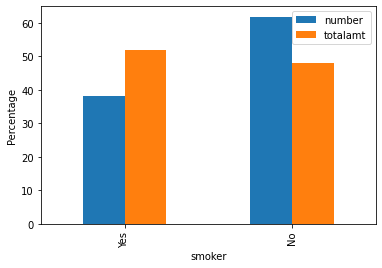

In [20]:

plt1=Dfnew1.plot.bar()
plt1.set_ylabel('Percentage')
plt1.legend()

In [22]:
R1=result.unstack()
R1

       smoker
count  Yes        93.000000
       No        151.000000
mean   Yes        20.756344
       No         19.188278
std    Yes         9.832154
       No          8.255582
min    Yes         3.070000
       No          7.250000
25%    Yes        13.420000
       No         13.325000
50%    Yes        17.920000
       No         17.590000
75%    Yes        26.860000
       No         22.755000
max    Yes        50.810000
       No         48.330000
dtype: float64

In [23]:
type(R1)

pandas.core.series.Series

In [24]:
R2=R1.unstack('smoker')
R2


smoker,Yes,No
count,93.000000,151.000000
mean,20.756344,19.188278
std,9.832154,8.255582
min,3.070000,7.250000
25%,13.420000,13.325000
50%,17.920000,17.590000
75%,26.860000,22.755000
max,50.810000,48.330000


In [25]:
R3=R2.loc[['count','mean','min','max']]
R3

smoker,Yes,No
count,93.000000,151.000000
mean,20.756344,19.188278
min,3.070000,7.250000
max,50.810000,48.330000


In [25]:
type(R3)

pandas.core.frame.DataFrame

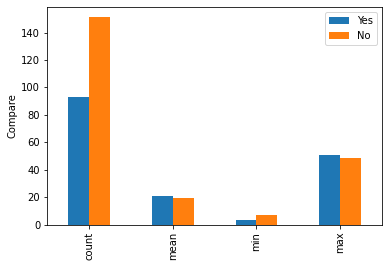

In [26]:
plt1=R3.plot.bar(y=['Yes','No'])
plt1.set_ylabel('Compare')
plt1.legend()

# Forth lecture

In [3]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
grouped = tips.groupby(['day', 'smoker'])

In [6]:
grouped.sum()

total_bill     tip  size   tip_pct
day  smoker                                    
Thur Yes         326.24   51.51    40  2.785676
     No          770.09  120.32   112  7.213414
Fri  Yes         252.20   40.71    31  2.621746
     No           73.68   11.25     9  0.606602
Sat  Yes         893.62  120.77   104  6.212055
     No          884.78  139.63   115  7.112145
Sun  Yes         458.28   66.82    49  3.557756
     No         1168.88  180.57   167  9.126438

# difference in as_index and group_keys
* setting as_index False : maintains the hierarchy but with default index values and uses the initial indices as columns
* setting group_keys=false also makes grouping keys as column but does not maintain hierarchy

In [27]:
tips.groupby('smoker', as_index=False).apply(topnrows)

total_bill   tip     sex smoker   day    time  size   tip_pct
0 109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
  183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
  67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
  178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
  172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
1 88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
  185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
  51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
  149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
  232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990

## Suppressing group keys

In [28]:
tips.groupby('smoker',group_keys=False).apply(topnrows)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990


# More exploration: Consider a dataframe of a class having marks in two subjects for 50 students. Need is to do bucket analysis. so buckets must be of same length in both cases. Also, need is to only look for corresponding index labels in second column corresponding to row index found in the buckets of one column

## cut :equal-length bucket
* Qcut: equal-sized bucket
* using a new data frame

In [13]:
import numpy as np

In [29]:
frame = pd.DataFrame({'Subject1': np.random.rand(50)*100,
                      'Subject2': np.random.rand(50)*100})
quartiles=pd.cut(frame.Subject1, 4)


In [41]:
quartiles.values.categories

IntervalIndex([(2.464, 26.618], (26.618, 50.675], (50.675, 74.732], (74.732, 98.789]],
              closed='right',
              dtype='interval[float64]')

In [42]:
quartiles.values

[(74.732, 98.789], (50.675, 74.732], (50.675, 74.732], (50.675, 74.732], (50.675, 74.732], ..., (26.618, 50.675], (2.464, 26.618], (50.675, 74.732], (2.464, 26.618], (26.618, 50.675]]
Length: 50
Categories (4, interval[float64]): [(2.464, 26.618] < (26.618, 50.675] < (50.675, 74.732] < (74.732, 98.789]]

In [43]:
quartiles.values.categories

IntervalIndex([(2.464, 26.618], (26.618, 50.675], (50.675, 74.732], (74.732, 98.789]],
              closed='right',
              dtype='interval[float64]')

In [44]:
s=pd.Series(quartiles.values.codes.tolist())

In [45]:
s

0     3
1     2
2     2
3     2
4     2
5     0
6     1
7     1
8     0
9     3
10    0
11    3
12    0
13    1
14    0
15    2
16    3
17    1
18    0
19    0
20    0
21    2
22    3
23    3
24    1
25    1
26    1
27    3
28    0
29    3
30    2
31    0
32    3
33    0
34    3
35    2
36    1
37    0
38    3
39    3
40    2
41    2
42    0
43    0
44    0
45    1
46    0
47    2
48    0
49    1
dtype: int64

In [46]:
s.value_counts()

0    17
3    12
2    11
1    10
dtype: int64

## Changing few values of Subject2

In [47]:
frame.iloc[10,1]=20
frame.iloc[20,1]=21

In [48]:
len(frame[(frame['Subject2']>=2.464) & (frame['Subject2']<26.618)]) 

11

## defining a fn which returns specific statistics of the group

In [38]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}


## use quartiles of subject1
* use grouping of row indices as that in quartiles of subject1 for subject2

In [51]:
grouped2 = frame.Subject2.groupby(quartiles)
grouped2.groups

{(2.464, 26.618]: [5, 8, 10, 12, 14, 18, 19, 20, 28, 31, 33, 37, 42, 43, 44, 46, 48], (26.618, 50.675]: [6, 7, 13, 17, 24, 25, 26, 36, 45, 49], (50.675, 74.732]: [1, 2, 3, 4, 15, 21, 30, 35, 40, 41, 47], (74.732, 98.789]: [0, 9, 11, 16, 22, 23, 27, 29, 32, 34, 38, 39]}

In [52]:
grouped2.count()

Subject1
(2.464, 26.618]     17
(26.618, 50.675]    10
(50.675, 74.732]    11
(74.732, 98.789]    12
Name: Subject2, dtype: int64

In [53]:
grouped2.sum()

Subject1
(2.464, 26.618]     749.846912
(26.618, 50.675]    501.987380
(50.675, 74.732]    589.134670
(74.732, 98.789]    598.365022
Name: Subject2, dtype: float64

In [54]:
grouped2.apply(get_stats)

Subject1               
(2.464, 26.618]   min      15.406115
                  max      83.886569
                  count    17.000000
                  mean     44.108642
(26.618, 50.675]  min      10.591206
                  max      94.103103
                  count    10.000000
                  mean     50.198738
(50.675, 74.732]  min       0.852423
                  max      90.394551
                  count    11.000000
                  mean     53.557697
(74.732, 98.789]  min       3.348174
                  max      96.582289
                  count    12.000000
                  mean     49.863752
Name: Subject2, dtype: float64

In [55]:
grouped2=grouped2.apply(get_stats).unstack()
grouped2

,min,max,count,mean
Subject1,,,,
"(2.464, 26.618]",15.406115,83.886569,17.0,44.108642
"(26.618, 50.675]",10.591206,94.103103,10.0,50.198738
"(50.675, 74.732]",0.852423,90.394551,11.0,53.557697
"(74.732, 98.789]",3.348174,96.582289,12.0,49.863752


# Let us do same functioalities for Subject 1

In [56]:
grouped1 = frame.Subject1.groupby(quartiles)
grouped1.groups

{(2.464, 26.618]: [5, 8, 10, 12, 14, 18, 19, 20, 28, 31, 33, 37, 42, 43, 44, 46, 48], (26.618, 50.675]: [6, 7, 13, 17, 24, 25, 26, 36, 45, 49], (50.675, 74.732]: [1, 2, 3, 4, 15, 21, 30, 35, 40, 41, 47], (74.732, 98.789]: [0, 9, 11, 16, 22, 23, 27, 29, 32, 34, 38, 39]}

In [57]:
grouped1=grouped1.apply(get_stats).unstack()
grouped1

,min,max,count,mean
Subject1,,,,
"(2.464, 26.618]",2.560612,24.522996,17.0,12.806467
"(26.618, 50.675]",27.595018,49.057875,10.0,39.280479
"(50.675, 74.732]",51.259200,69.867487,11.0,59.725659
"(74.732, 98.789]",76.817387,98.789279,12.0,87.368043


## now concatenate these two DFs by columns

In [58]:
p1=pd.concat([grouped1, grouped2], axis=1)

In [41]:
p1

,min,max,count,mean,min,max,count,mean
Subject1,,,,,,,,
"(0.811, 25.315]",0.908445,24.327210,18.0,13.458954,2.918615,96.225770,18.0,59.350709
"(25.315, 49.721]",32.411098,47.009994,7.0,39.844294,17.409896,75.420209,7.0,47.701741
"(49.721, 74.127]",52.017847,73.042833,10.0,64.348874,2.217198,92.925241,10.0,36.817778
"(74.127, 98.533]",80.795061,98.533283,15.0,89.692462,13.625258,96.840101,15.0,53.569939


## ifneed is to have hierarchical level: make a dictionary and then combine

In [59]:
dict1={}
dict1['S1']=grouped1
dict1['S2']=grouped2

In [60]:
newdfH=pd.concat(dict1,axis=1)

In [61]:
newdfH

S1                                     S2             \
                        min        max count       mean        min        max   
Subject1                                                                        
(2.464, 26.618]    2.560612  24.522996  17.0  12.806467  15.406115  83.886569   
(26.618, 50.675]  27.595018  49.057875  10.0  39.280479  10.591206  94.103103   
(50.675, 74.732]  51.259200  69.867487  11.0  59.725659   0.852423  90.394551   
(74.732, 98.789]  76.817387  98.789279  12.0  87.368043   3.348174  96.582289   

                                   
                 count       mean  
Subject1                           
(2.464, 26.618]   17.0  44.108642  
(26.618, 50.675]  10.0  50.198738  
(50.675, 74.732]  11.0  53.557697  
(74.732, 98.789]  12.0  49.863752

In [62]:
(newdfH.stack(level=0))

count        max       mean        min
Subject1                                                   
(2.464, 26.618]  S1   17.0  24.522996  12.806467   2.560612
                 S2   17.0  83.886569  44.108642  15.406115
(26.618, 50.675] S1   10.0  49.057875  39.280479  27.595018
                 S2   10.0  94.103103  50.198738  10.591206
(50.675, 74.732] S1   11.0  69.867487  59.725659  51.259200
                 S2   11.0  90.394551  53.557697   0.852423
(74.732, 98.789] S1   12.0  98.789279  87.368043  76.817387
                 S2   12.0  96.582289  49.863752   3.348174

In [63]:
newdfH.columns.name='Newlevel'

In [64]:
newdfH.columns

MultiIndex([('S1',   'min'),
            ('S1',   'max'),
            ('S1', 'count'),
            ('S1',  'mean'),
            ('S2',   'min'),
            ('S2',   'max'),
            ('S2', 'count'),
            ('S2',  'mean')],
           name='Newlevel')

In [41]:
newdfH.index

CategoricalIndex([(1.607, 26.121], (26.121, 50.537], (50.537, 74.953],
                  (74.953, 99.369]],
                 categories=[(1.607, 26.121], (26.121, 50.537], (50.537, 74.953], (74.953, 99.369]], ordered=True, name='Subject1', dtype='category')

In [65]:
newdfH

S1                                     S2             \
                        min        max count       mean        min        max   
Subject1                                                                        
(2.464, 26.618]    2.560612  24.522996  17.0  12.806467  15.406115  83.886569   
(26.618, 50.675]  27.595018  49.057875  10.0  39.280479  10.591206  94.103103   
(50.675, 74.732]  51.259200  69.867487  11.0  59.725659   0.852423  90.394551   
(74.732, 98.789]  76.817387  98.789279  12.0  87.368043   3.348174  96.582289   

                                   
                 count       mean  
Subject1                           
(2.464, 26.618]   17.0  44.108642  
(26.618, 50.675]  10.0  50.198738  
(50.675, 74.732]  11.0  53.557697  
(74.732, 98.789]  12.0  49.863752

## using stack() to get H. Level

In [68]:
N1=newdfH.stack()

In [69]:
N1

S1         S2
Subject1                                    
(2.464, 26.618]  min     2.560612  15.406115
                 max    24.522996  83.886569
                 count  17.000000  17.000000
                 mean   12.806467  44.108642
(26.618, 50.675] min    27.595018  10.591206
                 max    49.057875  94.103103
                 count  10.000000  10.000000
                 mean   39.280479  50.198738
(50.675, 74.732] min    51.259200   0.852423
                 max    69.867487  90.394551
                 count  11.000000  11.000000
                 mean   59.725659  53.557697
(74.732, 98.789] min    76.817387   3.348174
                 max    98.789279  96.582289
                 count  12.000000  12.000000
                 mean   87.368043  49.863752

<AxesSubplot:xlabel='Subject1,None'>

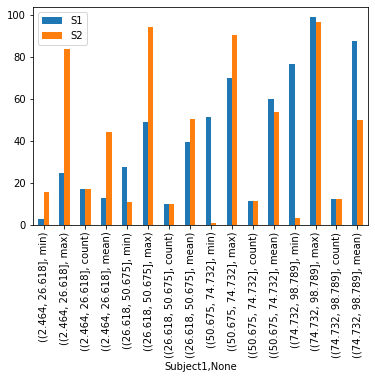

In [70]:
N1.plot.bar()

## Problem2: Make groups of same size for both columns and the find min,max,mean,std of value: 

In [43]:
# Return quantile numbers
grouping = pd.qcut(frame.Subject1, 10, labels=False)

## use these mapping to get grouping content of subject2

In [44]:
grouped = frame.Subject2.groupby(grouping)
grouped.apply(get_stats)

Subject1       
0         min       1.830716
          max      97.120981
          count     5.000000
          mean     53.006123
1         min      43.778640
          max      84.312649
          count     5.000000
          mean     65.243173
2         min       1.709235
          max      77.571591
          count     5.000000
          mean     35.296555
3         min      12.169753
          max      75.640601
          count     5.000000
          mean     44.994461
4         min      18.931802
          max      88.284015
          count     5.000000
          mean     43.814488
5         min       4.023963
          max      71.775347
          count     5.000000
          mean     31.986973
6         min       0.762318
          max      81.128823
          count     5.000000
          mean     39.573264
7         min      20.000000
          max      87.854396
          count     5.000000
          mean     50.424213
8         min      23.177318
          max      99.81045

In [46]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
Subject1,,,,
0,32.014787,80.520254,5.0,55.313141
1,25.707740,81.668691,5.0,60.029222
2,0.562579,98.493713,5.0,31.773567
3,16.813642,88.271903,5.0,64.039130
4,3.120393,59.914902,5.0,32.568381
5,5.491168,51.291248,5.0,27.390360
6,5.668110,89.596351,5.0,44.829787
7,8.351368,96.059090,5.0,40.632648
8,1.866068,63.868703,5.0,33.639032


## Example: Filling Missing Values with Group-Specific       Values

In [71]:
frame

,Subject1,Subject2
0,81.792452,45.322714
1,65.514921,56.449752
2,51.546931,84.947615
3,56.746662,48.126700
4,69.632737,17.118229
5,3.787023,28.308580
6,37.735594,44.663624
7,49.057875,17.353082
8,7.303249,33.349734
9,86.360904,71.877538


## setting some Nan values in Frame

In [72]:
frame.iloc[10,1]=np.NaN
frame.iloc[20,1]=np.NaN
frame.iloc[30,0]=np.NaN
frame.iloc[25,1]=np.NaN

In [74]:
frame.isna()

,Subject1,Subject2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## getting number of na values in each column

In [75]:
frame.isna().sum()

Subject1    1
Subject2    3
dtype: int64

## display count of nas in each rows having atleast one  na

In [76]:
for i in range(len(frame.index)) :
    countna=frame.iloc[i].isna().sum()
    if countna >0 :
        print("Nan in row ", i , " : " , countna )

Nan in row  10  :  1
Nan in row  20  :  1
Nan in row  25  :  1
Nan in row  30  :  1


# getting total number of na values 

In [274]:
frame.isna().sum().sum()

0

In [275]:
frame.sum()

Subject1    2454.046837
Subject2    2396.141388
dtype: float64

In [276]:
frame.mean()

Subject1    49.080937
Subject2    47.922828
dtype: float64

## get rows with any NA

In [79]:
frame[frame.isna().any(axis=1)==True]

,Subject1,Subject2
10,2.597151,NaN
20,24.180804,NaN
25,40.101190,NaN
30,NaN,66.99688


## Let us get rows with details having NA values using iterators

In [65]:
rowsindex_NA = [(index,row) for index, row in frame.iterrows() if row.isna().any()]
rowsindex_NA

[(10,
  Subject1    92.240772
  Subject2          NaN
  Name: 10, dtype: float64),
 (20,
  Subject1    36.223256
  Subject2          NaN
  Name: 20, dtype: float64),
 (25,
  Subject1    45.374844
  Subject2          NaN
  Name: 25, dtype: float64),
 (30,
  Subject1          NaN
  Subject2    50.260845
  Name: 30, dtype: float64)]

## select  subset of rows of original DF 

In [61]:
frame[19:31]

,Subject1,Subject2
19,54.523615,71.775347
20,73.993123,NaN
21,24.287306,34.553610
22,64.812291,0.762318
23,13.499016,43.778640
24,7.184045,74.703060
25,63.890086,NaN
26,89.510805,29.174639
27,23.631514,84.312649
28,8.608516,58.353802


## Replace NA values in columns with mean and display selected rows

In [66]:
frame.fillna(frame.mean())[19:31]

,Subject1,Subject2
19,94.348056,52.339948
20,36.223256,52.985453
21,22.814614,71.605021
22,62.604438,84.370570
23,0.908445,53.416553
24,98.533283,96.840101
25,45.374844,52.985453
26,39.073315,17.409896
27,6.348006,57.302460
28,22.187150,95.311865


## Using fillna() for groups: making a grouping list for the DF, note length must be same

In [80]:
group_key = ['A'] * 20 + ['B'] * 20 +['C']*10
group_key[-3:]

['C', 'C', 'C']

In [81]:
frame.groupby(group_key).mean()

,Subject1,Subject2
A,44.489372,49.958461
B,54.303190,52.316676
C,32.449796,49.683185


## adding group_key as column of frame1

In [69]:
frame1=frame
frame1['grades']=group_key
frame1.head(10)

,Subject1,Subject2,grades
0,67.151095,20.729425,A
1,18.048894,22.055707,A
2,52.017847,25.242373,A
3,22.932258,38.822657,A
4,19.572827,70.672772,A
5,12.985848,85.761245,A
6,84.766486,20.099085,A
7,82.121708,13.625258,A
8,73.042833,2.999593,A
9,2.923623,70.272252,A


## get row index with atleast one  NA value along with row contents

In [118]:
rowsindex_NA = [(index,row) for index, row in frame1.iterrows() if row.isna().any()]

In [96]:
rowsindex_NA

[(10,
  Subject1    70.188073
  Subject2          NaN
  grades              A
  Name: 10, dtype: object),
 (20,
  Subject1    91.096523
  Subject2          NaN
  grades              B
  Name: 20, dtype: object),
 (25,
  Subject1    7.712888
  Subject2         NaN
  grades             B
  Name: 25, dtype: object),
 (30,
  Subject1         NaN
  Subject2    2.050079
  grades             B
  Name: 30, dtype: object)]

## replacing NA values in each group by the mean of values in that gp

In [69]:
frame1.groupby(group_key).mean()

,Subject1,Subject2
A,62.499334,53.644239
B,38.571459,47.122677
C,55.139939,48.248557


#replacing NA value in each column of a gp with its mean of the gp

In [70]:
fnmeanfill = lambda g: g.fillna(g.mean())
frame1.groupby(group_key).apply(fnmeanfill)

Subject1   Subject2 grades
A 0   75.200001  54.415147      A
  1   26.852456  14.938416      A
  2   48.569747  42.970735      A
  3   94.319203  55.254672      A
  4   47.844308  36.072411      A
  5   82.521997  56.894652      A
  6   77.316415  37.938874      A
  7   24.774900  47.709923      A
  8   57.692206  37.957894      A
  9   28.125619  77.571591      A
  10  55.870471  53.644239      A
  11  78.335275  87.779787      A
  12  67.018315  81.128823      A
  13  92.846320  74.280316      A
  14  96.653602  50.603427      A
  15  77.296039  51.912651      A
  16  75.333958  87.854396      A
  17  37.911495  48.157508      A
  18  50.980747   4.023963      A
  19  54.523615  71.775347      A
B 20  73.993123  47.122677      B
  21  24.287306  34.553610      B
  22  64.812291   0.762318      B
  23  13.499016  43.778640      B
  24   7.184045  74.703060      B
  25  63.890086  47.122677      B
  26  89.510805  29.174639      B
  27  23.631514  84.312649      B
  28   8.608516  58.353802      B
  29   3.438375   1.830716      B
  30  38.571459   5.801164      B
  31  40.964131  12.169753      B
  32  38.237639  67.006172      B
  33  64.871788  73.747381      B
  34  49.920532  18.931802      B
  35   1.704351  85.574692      B
  36  43.788995  88.284015      B
  37  71.179588  34.448907      B
  38  29.712910  75.640601      B
  39  19.622718  59.134259      B
C 40  35.881290  21.998271      C
  41  90.184017  70.258100      C
  42  27.937904   1.709235      C
  43  64.507715   7.778895      C
  44  13.890209  80.636517      C
  45  86.929805  23.177318      C
  46  78.412622  99.810451      C
  47  99.369386  47.182328      C
  48  48.689464  32.813478      C
  49   5.596981  97.120981      C

## filling specified values for NA for each group irrespective of column

In [70]:
frame1.groupby(group_key).sum()

,Subject1,Subject2
A,1184.743539,865.407076
B,783.706730,1057.772925
C,446.998297,567.136288


In [71]:
fill_values = {'A': 10, 'B': 20, 'C':30}
fillfn = lambda g: g.fillna(fill_values[g.name])
f2=frame1.groupby(group_key).apply(fillfn)

## Let us see the change in each group

In [73]:
f2.groupby(group_key).sum()

,Subject1,Subject2
A,1249.986687,1029.240534
B,752.857729,888.208178
C,551.399394,482.485573
